# **Decision Tree for IRIS Dataset**

> **1. Data Pre-processing :**

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import Dataset

df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Get unique values in Obejct data type column

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Encoding the String values from the 'Species' column

df['Species'] = df['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [13]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3
149,150,5.9,3.0,5.1,1.8,3


In [14]:
# Drop the unwanted column from the dataset

df.drop('Id', axis=1, inplace=True)

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
# Divide dataset in dependent and independent variables

X = df.drop('Species', axis=1)
Y = df['Species']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

> **2. Training the Model :**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier = DecisionTreeClassifier()
model = classifier.fit(x_train, y_train)

> **3. Predict the Output :**

In [23]:
y_pred = classifier.predict(x_test)

> **4. Model Evaluation Techniques :**

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [27]:
rp = classification_report(y_test, y_pred)
print(rp)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
score = accuracy_score(y_test, y_pred)
print(score)

1.0


In [29]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


> **5. Plot the Decision Tree :**

In [30]:
from sklearn import tree

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

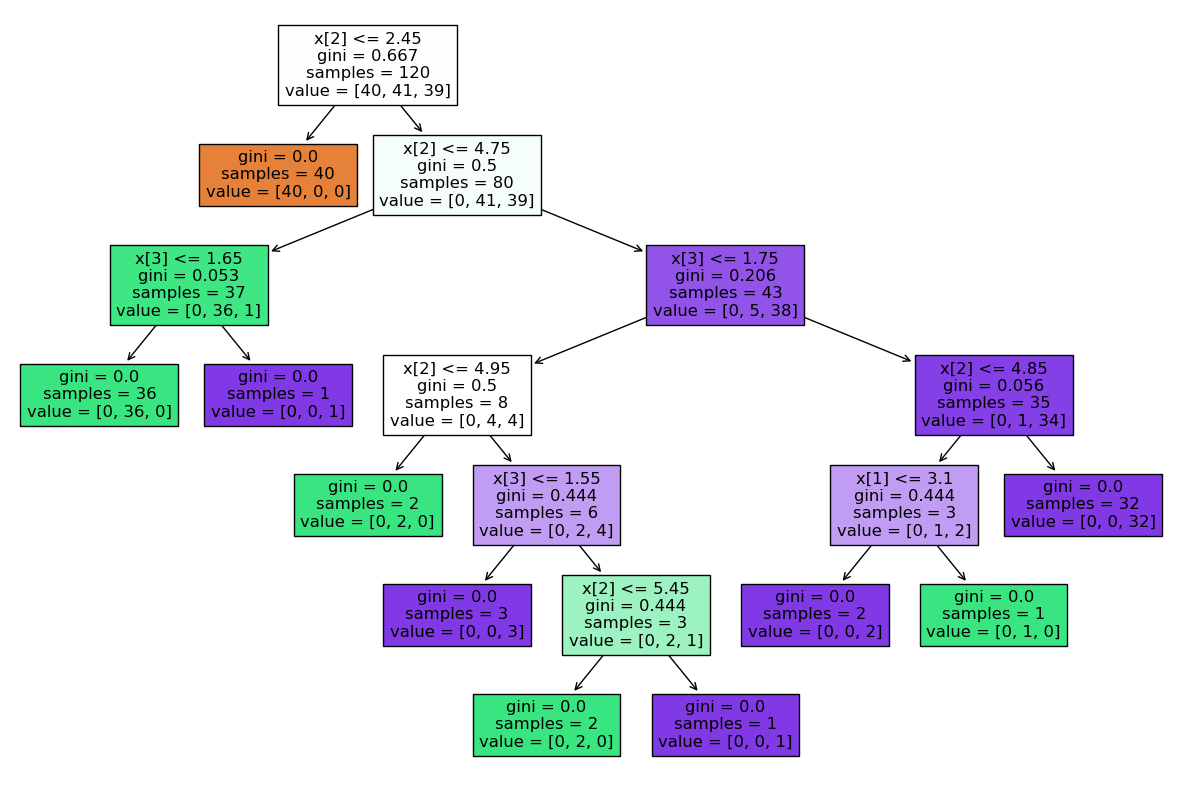

In [31]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True)